In [106]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#assumed as spot rates
us_fed=pd.read_csv("rates1.csv",index_col='years')

#calculate forward rate
def forward(a=1,b=1):
    fr=(us_fed.loc[a+b]**(a+b)/us_fed.loc[a]**a)** (1/b)
    #fr retuens pd.series ...fr.values returns np.array..[0] retruns value
    return fr.values[0]

#forward curve
def forward_curve(a=1):
    b=1
    #adding zeros to forward curves to match the length of spot-->to add in df
    f1=[0]*a
    while b<=len(us_fed)-a:
        #c=(us_fed.loc[a+b]**(a+b)/us_fed.loc[a]**a)** (1/b)
        c=forward(a,b)
        f1.append(c)
        b+=1
    return f1

def PV(n=1,coupon=1):
    b=1
    c=0
    while b<=n:
        if b<n:
            # coupon / (1+spot @n) ^ n
            c1=coupon/((1+us_fed.loc[b]/100)**b)
            c=c+c1
        else:
            #final coupon + pri
            c1=(100+coupon)/((1+us_fed.loc[b]/100)**b)
            c=c+c1
        b+=1
     #fr retuens pd.series ...fr.values returns np.array..[0] retruns value
    return c.values[0]

def par(n=1):
    b=1
    it=1
    c=0
    # init coupon=0 so that first PV always < 100
    coupon=0
    #resolution for PV=100. ie if margin =.1 then it accepts values
    #between 99.9 and 100.1 as ~100
    margin=.0001
    #initializing values for delta (dell)
    dell=(100-PV(n,coupon))/2
    # iterating to 500 to avoid infinite loop
    while (it <500):
        c=PV(n,coupon)
        if ((c >= 100-margin) & (c <= 100+margin)):
            break
        elif (c < 100-margin):
            old_coup=coupon
            #adding value to coupon to increase PV
            coupon=coupon+dell
        elif (c >= 100):
            # reducing delta and going back to old coupon
            dell= dell/2
            coupon=old_coup
        
        it+=1
        
    return coupon

def par_curve():
    b=1
    p1=[]
    while b<=len(us_fed):
        c=par(b)
        p1.append(c)
        b+=1
    return p1

#add Par curve to dataset for plotting
us_fed['par']=par_curve()
#to plot() we need to change 0 in forward to nan just for cosmetics
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

us_fed['forw_1']=zero_to_nan(forward_curve(1))
us_fed['forw_2']=zero_to_nan(forward_curve(2))
us_fed['forw_3']=zero_to_nan(forward_curve(3))

# us_fed.plot() --> if you want to plot



In [103]:
us_fed

,spot_rate,par,forw_1,forw_2,forw_3
years,,,,,
1,1.6000,1.599986,NaN,NaN,NaN
2,1.6100,1.609930,1.620063,NaN,NaN
3,1.6100,1.609964,1.615023,1.610000,NaN
4,1.6150,1.614829,1.620031,1.620016,1.630093
5,1.6200,1.619702,1.625039,1.626701,1.635117
6,1.6750,1.672486,1.690417,1.708478,1.742624
7,1.7300,1.724969,1.752671,1.780468,1.825834
8,1.7467,1.741241,1.768728,1.794799,1.834230
9,1.7630,1.756922,1.784509,1.809327,1.844869


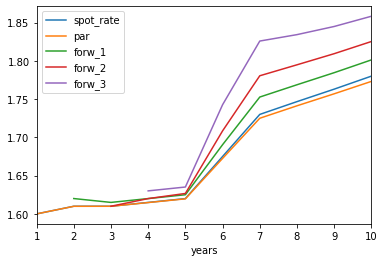

In [104]:
us_fed.plot()